<a href="https://colab.research.google.com/github/mtofighi/ChilwaBasin/blob/main/ReduceExcelRowsParticles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the Excel file
file_path = '/content/particleLocations_50001000.xlsx'
excel_data = pd.read_excel(file_path, sheet_name=None, header=0)

# Define the function to filter rows
def filter_rows(df):
    return df[df.index % 5 == 1]

# Apply the filter to each sheet
filtered_data = {sheet: filter_rows(df) for sheet, df in excel_data.items()}

# Save the filtered data back to Excel
output_file_path = '/content/particleLocations_filtered.xlsx'
with pd.ExcelWriter(output_file_path) as writer:
    for sheet, df in filtered_data.items():
        df.to_excel(writer, sheet_name=sheet, index=False)

output_file_path

In [7]:
import pandas as pd

# Load the Excel file
file_path = '/content/particleLocations_50001000.xlsx'
excel_data = pd.read_excel(file_path, sheet_name=None, header=0)

# Define the function to filter rows based on the specified pattern
def filter_rows(df):
    patterns = [2, 3]#, 4, 5, 6, 8, 10, 12, 15, 20]
    filtered_data = {f'Pattern_{pattern}': df[df.index % pattern == 1] for pattern in patterns}
    return filtered_data

# Apply the filter to each sheet
filtered_data = {sheet: filter_rows(df) for sheet, df in excel_data.items()}

# Save the filtered data back to Excel with new sheets
output_file_path = '/content/particleLocations_filtered.xlsx'
with pd.ExcelWriter(output_file_path) as writer:
    for sheet, patterns in filtered_data.items():
        for pattern, df in patterns.items():
            df.to_excel(writer, sheet_name=f'{sheet}_{pattern}', index=False)

output_file_path

'/content/particleLocations_filtered.xlsx'

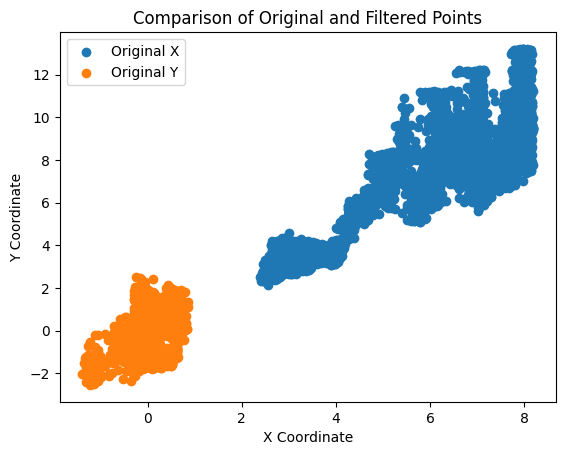

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/content/particleLocations_50001000.xlsx'
excel_data = pd.read_excel(file_path, sheet_name=None, header=0)

# Define the time steps to plot
time_steps_to_plot = [50, 100, 149]

# Plot original points
for sheet_name, sheet_data in excel_data.items():
    if all(f'Column{step}' in sheet_data.columns for step in time_steps_to_plot):
        plt.scatter(sheet_data[f'Column{time_steps_to_plot[0]}'], sheet_data[f'Column{time_steps_to_plot[1]}'], label=f'Original {sheet_name}')

# Load the filtered data
filtered_file_path = '/content/particleLocations_filtered.xlsx'
filtered_data = pd.read_excel(filtered_file_path, sheet_name=None, header=0)

# Plot filtered points
for sheet_name, sheet_data in filtered_data.items():
    for pattern, pattern_data in sheet_data.items():
        pattern_data_df = pattern_data.to_frame().reset_index(drop=True)  # Convert Series to DataFrame
        if all(f'Column{step}' in pattern_data_df.columns for step in time_steps_to_plot):
            plt.scatter(pattern_data_df[f'Column{time_steps_to_plot[0]}'], pattern_data_df[f'Column{time_steps_to_plot[1]}'], label=f'Filtered {sheet_name} - Pattern {pattern}')

# Show the legend and labels
plt.legend()
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Comparison of Original and Filtered Points')
plt.show()


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/content/particleLocations_50001000.xlsx'
excel_data = pd.read_excel(file_path, sheet_name=None, header=0)

# Define the time steps to plot
time_steps_to_plot = [0, 100, 149]

# Plot original points
for sheet_name, sheet_data in excel_data.items():
    if all(f'Column{step}' in sheet_data.columns for step in time_steps_to_plot):
        plt.scatter(
            sheet_data[f'Column{time_steps_to_plot[0]}'],
            sheet_data[f'Column{time_steps_to_plot[1]}'],
            label=f'Original {sheet_name}',
            s=50,  # Adjust the marker size as needed
            alpha=0.7  # Adjust transparency
        )

# Load the filtered data
filtered_file_path = '/content/particleLocations_filtered.xlsx'
filtered_data = pd.read_excel(filtered_file_path, sheet_name=None, header=0)

# Plot filtered points
for sheet_name, sheet_data in filtered_data.items():
    for pattern, pattern_data in sheet_data.items():
        pattern_data_df = pattern_data.to_frame().reset_index(drop=True)  # Convert Series to DataFrame
        if all(f'Column{step}' in pattern_data_df.columns for step in time_steps_to_plot):
            plt.scatter(
                pattern_data_df[f'Column{time_steps_to_plot[0]}'],
                pattern_data_df[f'Column{time_steps_to_plot[1]}'],
                label=f'Filtered {sheet_name} - Pattern {pattern}',
                s=50,  # Adjust the marker size as needed
                alpha=0.7  # Adjust transparency
            )

# Show the legend and labels
plt.legend()
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Comparison of Original and Filtered Points')
plt.show()

IndexError: list index out of range

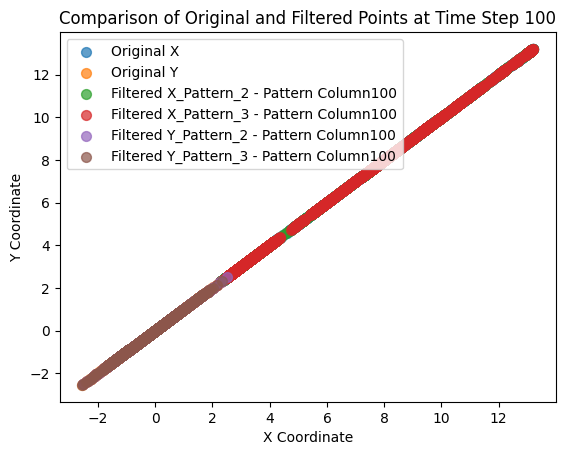

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/content/particleLocations_50001000.xlsx'
excel_data = pd.read_excel(file_path, sheet_name=None, header=0)

# Select the time step to plot
time_step_to_plot = 100

# Plot original points
for sheet_name, sheet_data in excel_data.items():
    if f'Column{time_step_to_plot}' in sheet_data.columns:
        plt.scatter(
            sheet_data['Column100'],
            sheet_data['Column100'],
            label=f'Original {sheet_name}',
            s=50,  # Adjust the marker size as needed
            alpha=0.7  # Adjust transparency
        )

# Load the filtered data
filtered_file_path = '/content/particleLocations_filtered.xlsx'
filtered_data = pd.read_excel(filtered_file_path, sheet_name=None, header=0)

# Plot filtered points
for sheet_name, sheet_data in filtered_data.items():
    for pattern, pattern_data in sheet_data.items():
        pattern_data_df = pattern_data.to_frame().reset_index(drop=True)  # Convert Series to DataFrame
        if f'Column{time_step_to_plot}' in pattern_data_df.columns:
            plt.scatter(
                pattern_data_df['Column100'],
                pattern_data_df['Column100'],
                label=f'Filtered {sheet_name} - Pattern {pattern}',
                s=50,  # Adjust the marker size as needed
                alpha=0.7  # Adjust transparency
            )

# Show the legend and labels
plt.legend()
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title(f'Comparison of Original and Filtered Points at Time Step {time_step_to_plot}')
plt.show()


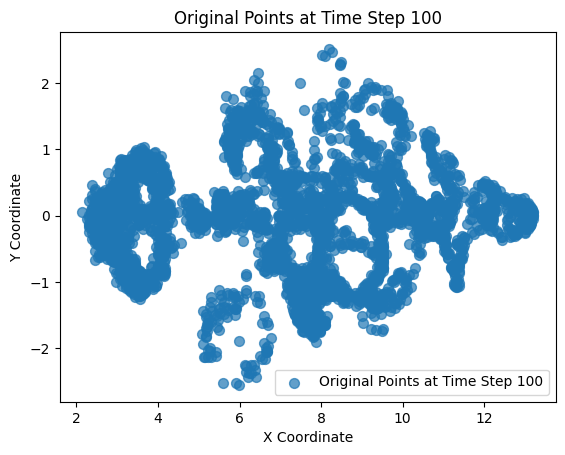

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/content/particleLocations_50001000.xlsx'
x_data = pd.read_excel(file_path, sheet_name='X', header=0)
y_data = pd.read_excel(file_path, sheet_name='Y', header=0)

# Select the time step to plot
time_step_to_plot = 100

# Plot original points
plt.scatter(
    x_data[f'Column{time_step_to_plot}'],
    y_data[f'Column{time_step_to_plot}'],
    label=f'Original Points at Time Step {time_step_to_plot}',
    s=50,  # Adjust the marker size as needed
    alpha=0.7  # Adjust transparency
)

# Show the legend and labels
plt.legend()
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title(f'Original Points at Time Step {time_step_to_plot}')
plt.show()
